In [20]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
#Cargamos el conjunto de datos 
dataset = read_csv('reporcol.csv')
dataset.head()
categorical_df = dataset.head(1000)
categorical_df = categorical_df.loc[:,['Cobertura','SEXO','ADMON','TIEMPO','NOMBREPLAN','DESC_ESTADO','DIVISION']]
categorical_df.head()

,Cobertura,SEXO,ADMON,TIEMPO,NOMBREPLAN,DESC_ESTADO,DIVISION
0,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
1,BASICA,F,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
2,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
3,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
4,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE


In [34]:
#Creamos una matriz con los datos
dataset = categorical_df.values
#Dividimos en X y y
X = dataset[:, :-1]
y = dataset[:,-1]
#Forzamos el tipo string
X = X.astype(str)


In [23]:
#Preparamos los datos de entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Preparamos los datos de salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [24]:
#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos ay
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_enc)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

Accuracy/exactitud: 98.50 %


C:\Users\mrchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Buscamos el modelo de clasificacion con seleccion de caracteristicas via Chi-cuadrada

In [25]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 154.441675
Característica 1: 1.522436
Característica 2: 482.313333
Característica 3: 16.150225
Característica 4: 778.830000
Característica 5: 333.426195
Accuracy/exactitud: 97.88 %


C:\Users\mrchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


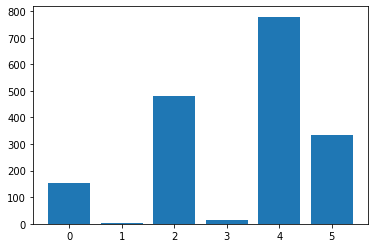

In [26]:
#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

## Buscando el modelo de clasificación con selección de características vía Información Mutua

In [29]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.127490
Característica 1: 0.022770
Característica 2: 0.275952
Característica 3: 0.145524
Característica 4: 0.424288
Característica 5: 0.839711
Accuracy/exactitud: 98.50 %


C:\Users\mrchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


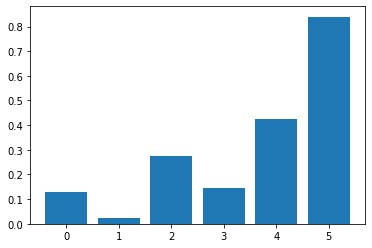

In [30]:
#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')